In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from math import exp

# Problem 1
## 1.1

In [2]:
housing_data = scipy.io.loadmat("data/housing_data.mat")

In [3]:
raw_x_train = pd.DataFrame(housing_data['Xtrain'])
raw_y_train = pd.DataFrame(housing_data['Ytrain'])
raw_x_validate = pd.DataFrame(housing_data['Xvalidate'])
raw_y_validate = pd.DataFrame(housing_data['Yvalidate'])
print(raw_x_train.shape, raw_y_train.shape)
print( raw_x_validate.shape,raw_y_validate.shape)

(19440, 8) (19440, 1)
(1200, 8) (1200, 1)


In [4]:
raw_x_train[9] = 1
raw_x_validate[9] = 1
print(raw_x_train.shape, raw_y_train.shape)
print(raw_x_validate.shape, raw_y_validate.shape)

(19440, 9) (19440, 1)
(1200, 9) (1200, 1)


In [5]:
raw_x_train.head()

,0,1,2,3,4,5,6,7,9
0,2.9241,32,1083,188,471,178,38.04,-121.11,1
1,4.8993,34,3306,555,1398,585,37.99,-122.55,1
2,5.0528,26,2256,360,937,372,38.13,-121.30,1
3,6.0634,15,1834,330,841,309,33.68,-117.78,1
4,1.7500,27,471,132,315,96,33.81,-118.18,1


In [6]:
X = raw_x_train.values
y = raw_y_train.values
x_val = raw_x_validate.values
y_val = raw_y_validate.values
w = np.zeros((1,8))

In [7]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(w.reshape((9,)))
y_hat = np.dot(x_val,w)

[  4.05879986e+04   1.19561189e+03  -8.50145688e+00   1.18352188e+02
  -3.77900280e+01   4.30562637e+01  -4.21794075e+04  -4.24573474e+04
  -3.56686439e+06]


## 1.2

In [8]:
rss = np.sum((y_val - y_hat) ** 2)
tss = np.sum((y_val - np.mean(y_val)) ** 2)
r_sqrd = 1 - (rss/tss)
print("RSS: %i" % rss)
print("R^2: %.3f" % r_sqrd)
print("Range of y Hat Values => Min: %i Max: %i" %(min(y_hat), max(y_hat)))
print("Range of True Y Values => Min: %i Max: %i" %(min(y_val), max(y_val)))

RSS: 5794953797676
R^2: 0.643
Range of y Hat Values => Min: -56562 Max: 710798
Range of True Y Values => Min: 28300 Max: 500001


These values do not make sense! How can we have negative household value? Since our model is not robust to outliers, they're likely pulling our entire graph up and messing up the values at the bottom.

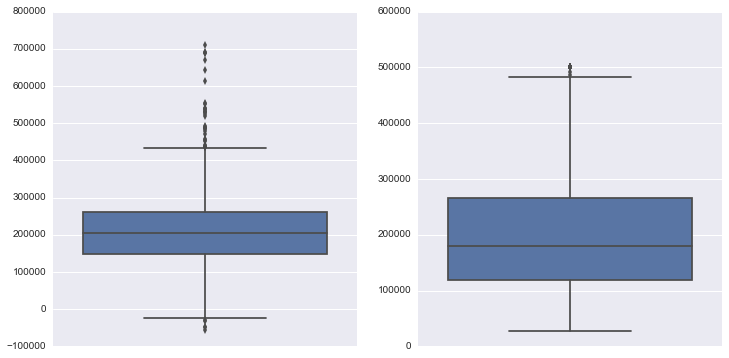

In [9]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True)
sns.boxplot(y_hat, orient='v', ax=axes[0])
sns.boxplot(y_val, orient='v', ax=axes[1])

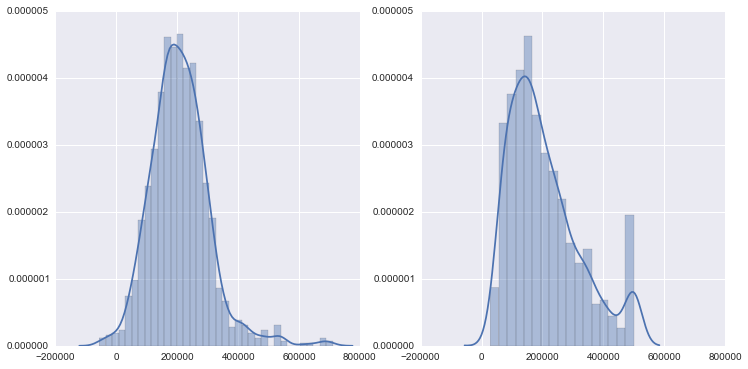

In [10]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True)
sns.distplot(y_hat, ax=axes[0])
sns.distplot(y_val, ax=axes[1])

## 1.3

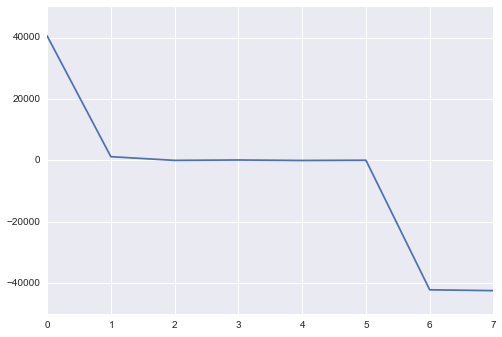

In [11]:
pd.Series(w.reshape((9,))[:8]).plot() # without bias value

## 1.4

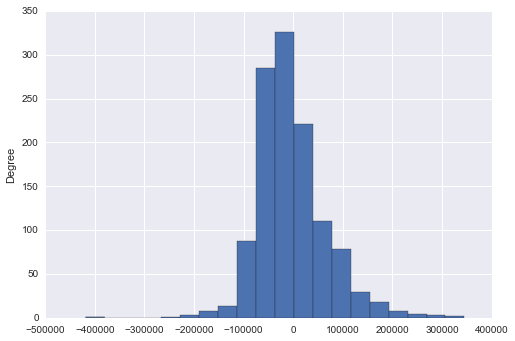

In [12]:
pd.Series((y_val - y_hat).reshape((1200,))).plot(kind='hist', bins=20)

This resembles the normal distribution! This is what we want out of our residuals - that our errors are drawn from a normal distribution and there isn't really any discernable patterns beyond the fact that no error is most common and large errors are rare. We can see however that it's a bit skewed.

# Problem 2

## 2.1 and 2.2

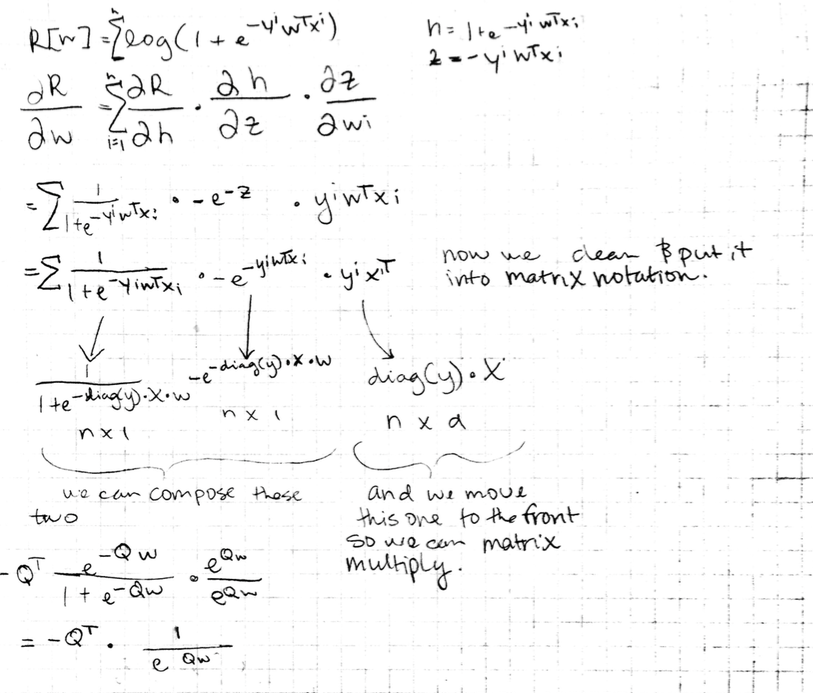

In [13]:
from IPython.display import Image
Image(filename='2.1.png')

## 2.2

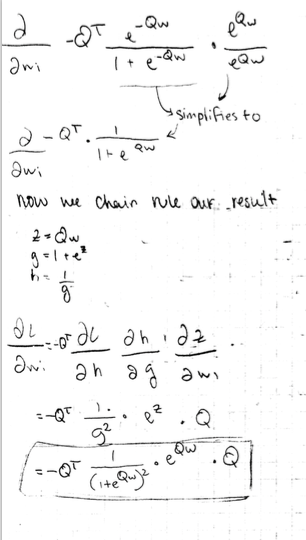

In [14]:
Image(filename='2.2.png')

## 2.3

In [15]:
X = np.array([
        [0,3,1],
        [1,3,1],
        [0,1,1],
        [1,1,1]
    ])
y = np.array([1,1,-1,-1])

In [16]:
def log_func(x):
    return 1 / (1 + np.exp(-x))

def descend(X, y, w, alpha):
    Q = np.dot(np.diag(y), X)
    z = np.dot(Q, w)
    top = np.exp(-z)
    bottom = 1 + np.exp(-z)
    combo = (np.dot(-Q.T, (top/bottom)))
    return w - alpha * combo

In [17]:
w_0 = np.array([-2,1,0])
w_0_pred = log_func(np.dot(X, w_0))
print(w_0)
print(w_0_pred)
print("---- end w_0 ----")
w_1 = descend(X, y, w_0, 1)
w_1_pred = log_func(np.dot(X, w_1))
print(w_1)
print(w_1_pred)
print("---- end w_1 ----")
w_2 = descend(X, y, w_1, 1)
w_2_pred = log_func(np.dot(X, w_2))
print(w_2)
print(w_2_pred)
print("---- end w_2 ----")

[-2  1  0]
[ 0.95257413  0.73105858  0.73105858  0.26894142]
---- end w_0 ----
[-2.          0.94910188 -0.68363271]
[ 0.89693957  0.54082713  0.56598026  0.15000896]
---- end w_1 ----
[-1.69083609  1.91981257 -0.83738862]
[ 0.99276849  0.96199213  0.74695242  0.35242149]
---- end w_2 ----


# Problem 3

### Transformations

In [18]:
def standardize_cols(X):
    zscore = lambda x: (x.mean() - x)/x.std()
    return pd.DataFrame(X).apply(zscore).values

def binarize_cols(X):
    temp = X.copy()
    temp[temp > 0] = 1
    temp[temp <= 0] = 0
    return temp

In [19]:
spam_data = scipy.io.loadmat("data/spam.mat")
Xraw = pd.DataFrame(spam_data['Xtrain'])
y = spam_data['Ytrain'].reshape((3450,))
Xtestraw = pd.DataFrame(spam_data['Xtest'])
print(Xraw.shape, y.shape, Xtestraw.shape)

stan_X = pd.DataFrame(standardize_cols(Xraw.values))
log_X = pd.DataFrame(np.log(Xraw.values + 0.1))
bin_X = pd.DataFrame(binarize_cols(Xraw.values))
stan_X[57] = 1
log_X[57] = 1
bin_X[57] = 1
Xraw[57] = 1
X = Xraw.values
stan_X = stan_X.values
log_X = log_X.values
bin_X = bin_X.values
print(X.shape, stan_X.shape, log_X.shape, bin_X.shape)

(3450, 57) (3450,) (1151, 57)
(3450, 58) (3450, 58) (3450, 58) (3450, 58)


## 3.1

In [20]:
def batch_gradient_descent(Q, w, alpha):
    z = np.dot(Q, w)
    top = np.exp(-z)
    bottom = 1 + np.exp(-z)
    combo = (np.dot(-Q.T, (top/bottom)))
    risk = np.sum(np.log(1 + np.exp(-z)))
    return w - alpha * combo / len(X), risk

def batch_wrapper(X, y, alpha, num_iters):
    w = np.zeros(len(X[0, :]))
    Q = np.dot(np.diag(y), X)
    risks = []
    for count in range(num_iters):
        new_w, risk = batch_gradient_descent(Q, w, alpha)
        risks.append(risk)
        w = new_w
    return w, pd.DataFrame(risks)

In [21]:
alpha = 0.005
num_iters = 5000

In [22]:
w2, risks2 = batch_wrapper(stan_X, y, alpha, num_iters)
w3, risks3 = batch_wrapper(log_X, y, alpha, num_iters)
w4, risks4 = batch_wrapper(bin_X, y, alpha, num_iters)

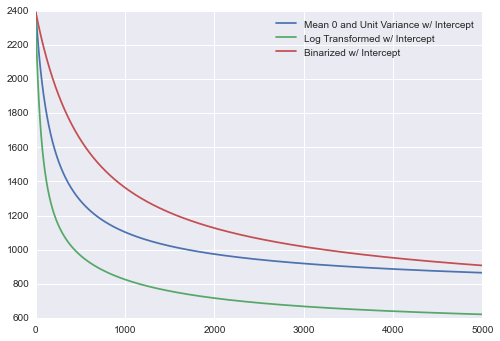

In [23]:
all_risks = pd.concat([risks2, risks3, risks4], axis=1)
all_risks.columns = ['Mean 0 and Unit Variance w/ Intercept', 'Log Transformed w/ Intercept', 'Binarized w/ Intercept']
all_risks.plot()
# # if you want each plot just call this
# risks2.plot()
# risks3.plot()
# risks4.plot() 

## 3.2

This is the same update as before except we only use one point to derive the gradient, not the entire dataset as we were doing before. You can see this in the code below where now *Q* is lowercase, signifying that we're doing it based on one row.

In [24]:
from random import shuffle

def shuffle_data(X, y):
    shuff = list(range(len(X)))
    shuffle(shuff)
    X = X[shuff]
    y = y[shuff]
    Q = np.dot(np.diag(y), X)
    return Q, X, y

def stochastic_gradient_descent(Q, w, alpha):
    z = np.dot(Q, w)
    top = np.exp(-z)
    bottom = 1 + top
    combo = (np.dot(-Q.T, (top/bottom)))
    return w - alpha * combo

def stochastic_wrapper(X, y, num_iters, alpha):
    w = np.zeros(len(X[0,:]))
    risks = []
    Q, X, y = shuffle_data(X, y)
    nullr = False
    if not alpha:
        nullr = True
    for count in range(num_iters):
        if nullr:
            alpha = 1 / (count + 1)
        choice = np.random.randint(0,len(X))
        new_w = stochastic_gradient_descent(Q[choice], w, alpha)
        w = new_w
        risks.append(np.sum(np.log(1 + np.exp(-Q.dot(w)))))
    return w, pd.DataFrame(risks)

In [25]:
learning_rate = 0.001
num_iters = 10000

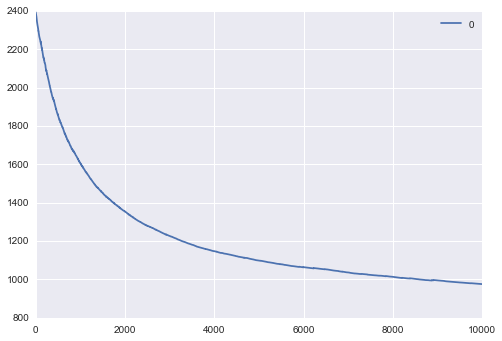

In [26]:
w2, risks2 = stochastic_wrapper(stan_X, y, num_iters, learning_rate)
risks2.plot()

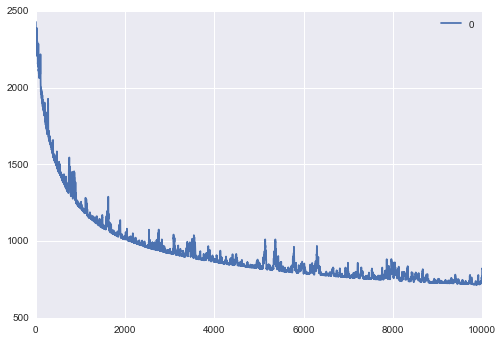

In [27]:
w3, risks3 = stochastic_wrapper(log_X, y, num_iters, learning_rate)
risks3.plot()

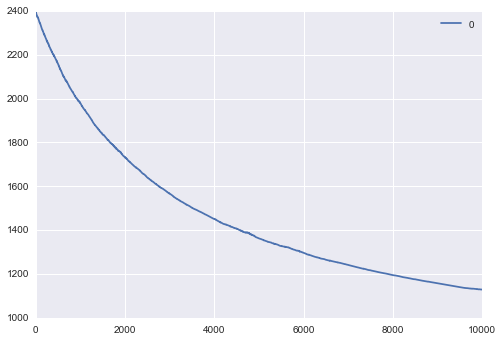

In [28]:
w4, risks4 = stochastic_wrapper(bin_X, y, num_iters, learning_rate)
risks4.plot()

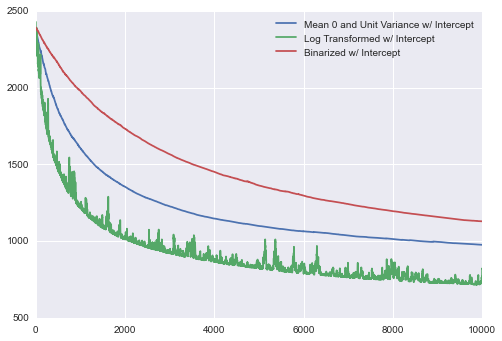

In [29]:
all_risks = pd.concat([risks2,risks3,risks4], axis=1)
all_risks.columns = ['Mean 0 and Unit Variance w/ Intercept', 'Log Transformed w/ Intercept', 'Binarized w/ Intercept']
all_risks.plot()

The plots are different from before because they're a lot choppier. This makes sense as we're not always choosing the optimal gradient to go down.

## 3.3

In [30]:
learning_rate = None
num_iters = 1000

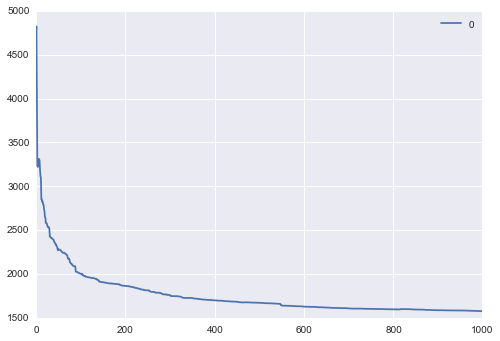

In [31]:
w2, risks2 = stochastic_wrapper(stan_X, y, num_iters, learning_rate)
risks2.plot()

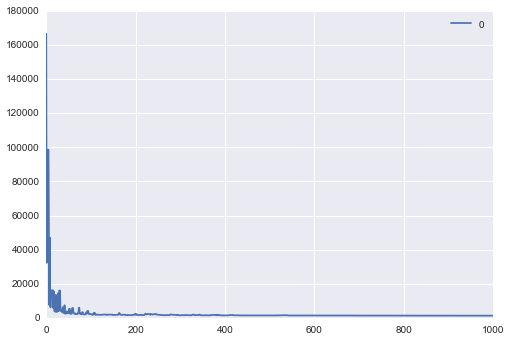

In [32]:
w3, risks3 = stochastic_wrapper(log_X, y, num_iters, learning_rate)
risks3.plot()

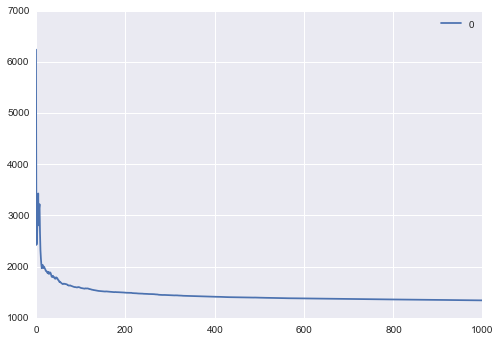

In [33]:
w4, risks4 = stochastic_wrapper(bin_X, y, num_iters, learning_rate)
risks4.plot()

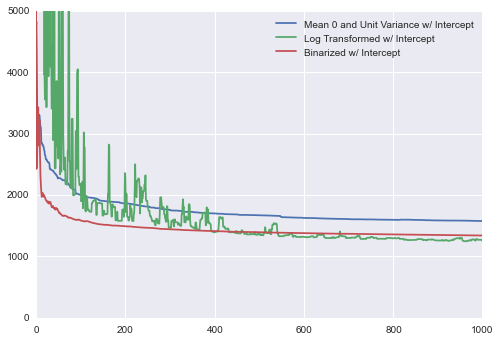

In [34]:
all_risks = pd.concat([risks2,risks3,risks4], axis=1)
all_risks.columns = ['Mean 0 and Unit Variance w/ Intercept', 'Log Transformed w/ Intercept', 'Binarized w/ Intercept']
all_risks.plot(ylim=(0, 5000))

The automatic iteration is much less stable, it also seems to get stuck in a local minimum. 

## 3.4.a

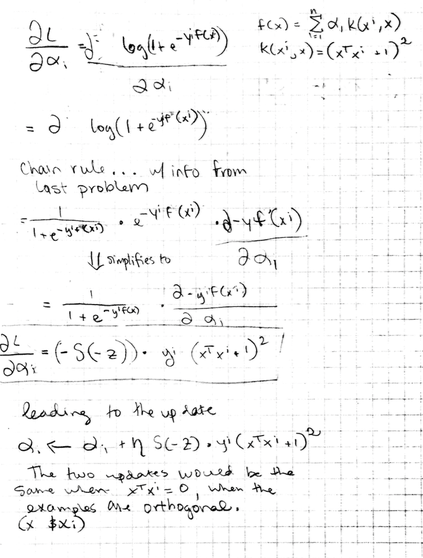

In [35]:
Image(filename='3.4.a.png')

## 3.4.b

In [36]:
def qkrsgd_test(vX, vy, tX, alpha):
    val_risk = []
    for count, (xi, yi) in enumerate(zip(vX, vy)):
        fx = np.dot(alpha, np.power((np.dot(tX, xi) + 1), 2))
        z = yi * fx
        loss = np.log(1 + np.exp(z * -1))
        val_risk.append(loss)
    return np.sum(val_risk) / len(vX)

def qkrsgd_wrapper(X, y, gamma, num_iters, lr=None):
    split = int(len(X) * 2 / 3)
    tX, ty = X[:split], y[:split]
    vX, vy = X[split:], y[split:]
    print("Creating training and test sets of %i and %i" % (len(tX), len(vX)))
    alpha = np.zeros(split)
    print("Creating alphas of length: ", len(alpha))
    np.random.seed(200)
    iters = np.random.choice(split, num_iters)
    print("Creating iteration choices of length ", len(iters))
    nullLR = False
    if not lr:
        nullLR = True
        print("auto learning rate")
    else:
        print("Learning rate of ", lr)
    risks = []
    iteration_numbers = []
    val_risks = []
    epoch_risk = []
    
    kernel_gram = np.power((tX.dot(tX.T) + 1), 2)
    kgwy = kernel_gram.dot(np.diag(ty))
    
    for count, choice in enumerate(iters):
        if nullLR:
            lr = 0.0001 / (count/5 + 1)
        ai = alpha[choice]
        yi = ty[choice]
        update_prep = alpha.dot(kgwy)
        zi = update_prep[choice]
#         if zi > 200:
#             print("WARNING: LARGE Z VALUE => NOW CLAMPING")
#             zi = 200
        s = lambda z: 1 / (1 + np.exp(-1 * zi))
        update = ai - (gamma * ai) + (lr * s(zi) * ty[choice])
        alpha[choice] = update
        alpha[choice+1:] -= (alpha[choice+1:] * gamma)
        alpha[:choice] -= (alpha[:choice] * gamma)


        if count % 100 == 0:
            risk = np.sum(np.log(1 + np.exp(update_prep * -1))) / len(tX)
            iteration_numbers.append(count)
            risks.append(risk)
            epoch_risk = [] # resetting the epoch risk
            val_risks.append(qkrsgd_test(vX, vy, tX,  alpha))
    return alpha, pd.DataFrame({
            "iteration_number": iteration_numbers,
            "training_risk":risks,
            "validation_risk": val_risks
        })

In [37]:
gamma, iters, lr = 10e-5, 10000, 0.00005

Creating training and test sets of 2300 and 1150
Creating alphas of length:  2300
Creating iteration choices of length  10000
Learning rate of  5e-05


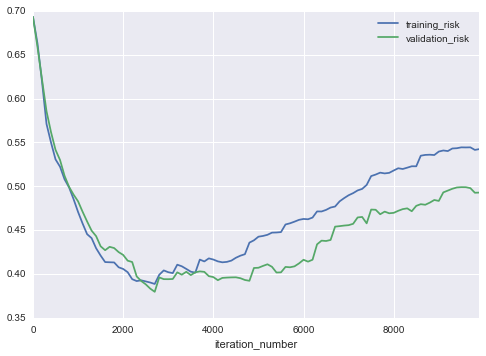

In [38]:
w, risks = qkrsgd_wrapper(stan_X, y, gamma, iters, lr)
risks.plot(x='iteration_number')

## 3.4.c

In [39]:
def lkrsgd_test(vX, vy, tX, alpha):
    val_risk = []
    for count, (xi, yi) in enumerate(zip(vX, vy)):
        fx = np.dot(alpha, (np.dot(xi, tX.T) + 1))
        z = yi * fx
        loss = np.log(1 + np.exp(z * -1))
        val_risk.append(loss)
    return np.sum(val_risk) / len(vX)

def lkrsgd_wrapper(X, y, gamma, num_iters, lr=None):
    split = int(len(X) * 2 / 3)
    tX, ty = X[:split], y[:split]
    vX, vy = X[split:], y[split:]
    print("Creating training and test sets of %i and %i" % (len(tX), len(vX)))
    alpha = np.zeros(split)
    print("Creating alphas of length: ", len(alpha))
    np.random.seed(200)
    iters = np.random.choice(split, num_iters)
    print("Creating iteration choices of length ", len(iters))
    nullLR = False
    if not lr:
        nullLR = True
        print("auto learning rate")
    else:
        print("Learning rate of ", lr)
    risks = []
    iteration_numbers = []
    val_risks = []
    epoch_risk = []
    
    kernel_gram = (tX.dot(tX.T) + 1)
    kgwy = kernel_gram.dot(np.diag(ty))
    
    for count, choice in enumerate(iters):
        if nullLR:
            lr = 0.0001 / (count/5 + 1)
        ai = alpha[choice]
        yi = ty[choice]
        update_prep = alpha.dot(kgwy)
        zi = update_prep[choice]
        if zi > 200:
            print("WARNING: LARGE Z VALUE => NOW CLAMPING")
            zi = 200
        s = lambda z: 1 / (1 + np.exp(-zi))
        update = ai - (gamma * ai) + (lr * s(zi) * ty[choice])
        alpha[choice] = update
        alpha[choice+1:] -= (alpha[choice+1:] * gamma)
        alpha[:choice] -= (alpha[:choice] * gamma)


        if count % 100 == 0:
            risk = np.sum(np.log(1 + np.exp(update_prep * -1))) / len(tX)
            iteration_numbers.append(count)
            risks.append(risk)
            epoch_risk = [] # resetting the epoch risk
            val_risks.append(qkrsgd_test(vX, vy, tX, alpha))
    return alpha, pd.DataFrame({
            "iteration_number": iteration_numbers,
            "training_risk":risks,
            "validation_risk": val_risks
        })

Creating training and test sets of 2300 and 1150
Creating alphas of length:  2300
Creating iteration choices of length  13000
Learning rate of  7.5e-05


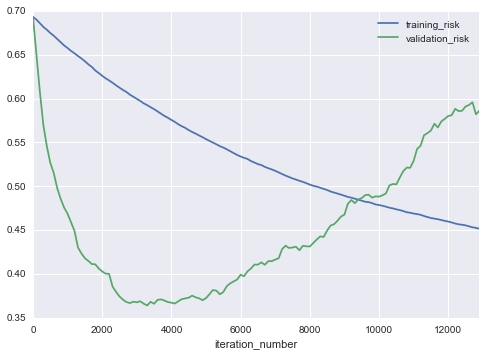

In [49]:
gamma, iters, lr = 10e-5, 13000, 0.000075
w2, risks2 = lkrsgd_wrapper(stan_X, y, gamma, iters, lr)
risks2.plot(x='iteration_number')

We can see that the linear kernel, has a much lesser capacity for information that the quadratic kernel. Therefore it descends more slowly (requiring more iterations) and also has a smaller validation risk. However we can see towards the end that the linear kernel will overfit as well. In fact the more data we look at, the worse it seems to perform.

Both of them see to be overfitting the data a lot, I don't think that our sample size justifies the use of this kernel.

If we wanted to try and reduce overfitting, increasing $\gamma$ would be a way that we could do that.

# Problem 4

One of the issues could be that it's going to be hard for the kernel function to take advantage of this new information. One reason for the observed problem is that 00:00 and 23:59 are nearly the same time but are represented completely differently. One would be a large number while the other one would be a smaller one. Time is not continuous in the way that he is using it. Therefore he should try another representation - perhaps treating it as a categorical variable for hour and minute. That might allow for cleaner use of interactions that the kernel would generate. 